In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dst0 = pd.read_parquet("/content/drive/MyDrive/datasets/pratica e pesquisa/DST-0/G1-2022-02-10.parquet")
dstA = pd.read_parquet("/content/drive/MyDrive/datasets/pratica e pesquisa/DST-A/G1-2022-02-10.parquet")
dstB = pd.read_parquet("/content/drive/MyDrive/datasets/pratica e pesquisa/DST-B/G1-2022-02-10.parquet")
dstC = pd.read_parquet("/content/drive/MyDrive/datasets/pratica e pesquisa/DST-C/G1-2022-02-10.parquet")
dstD = pd.read_parquet("/content/drive/MyDrive/datasets/pratica e pesquisa/DST-D/G1-2022-02-10.parquet")
dstE = pd.read_parquet("/content/drive/MyDrive/datasets/pratica e pesquisa/DST-E/G1-2022-02-10.parquet")

In [ ]:
#merge dos DSTs
interval = dstD[['ID', 'INTERVAL']]
neighborhood = dstB[['ID', 'CODBAIRRO']]
df = pd.merge(dstE, interval, on='ID', how='left')
df = pd.merge(df, neighborhood, on='ID', how='left')
df['INTERVAL'] = df['INTERVAL'].dt.total_seconds()
dstA

In [ ]:
#calcular poluicao
df['CO2_total'] = np.multiply(df['CO_2'], df['INTERVAL'])
df['CO_total'] = np.multiply(df['CO'], df['INTERVAL'])
df['NO_x_total'] = np.multiply(df['NO_x'], df['INTERVAL'])


In [ ]:
#sub datasets
df_co2 = df.loc[:, ['ID', 'CODBAIRRO', 'CO2_total']]
df_co = df.loc[:, ['ID', 'CODBAIRRO', 'CO_total']]
df_nox = df.loc[:, ['ID', 'CODBAIRRO', 'NO_x_total']]

In [ ]:
#calculando media
df_co2_media = df_co2.groupby('CODBAIRRO').mean().round()
df_co2_media = df_co2_media.rename(columns={'CO2_total': 'MEDIA_CO2'})
df_co2_media = df_co2_media.reset_index()

df_co_media = df_co.groupby('CODBAIRRO').mean().round()
df_co_media = df_co_media.rename(columns={'CO_total': 'MEDIA_CO'})

df_nox_media = df_co.groupby('CODBAIRRO').mean().round()
df_nox_media = df_co_media.rename(columns={'NO_x_total': 'MEDIA_NO_x'})

Text(0, 0.5, 'gramas de CO2')

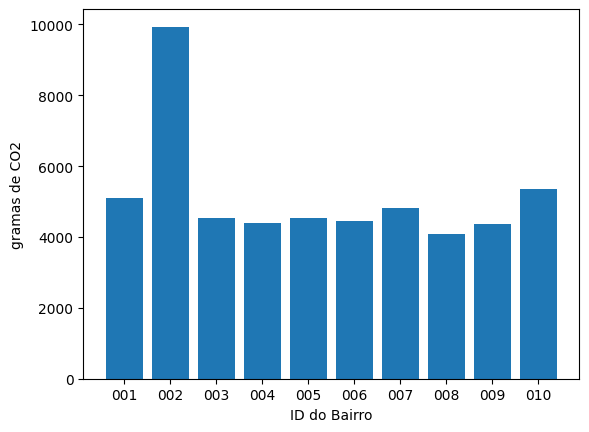

In [ ]:
  #grafico de barras
  df_co2_media = df_co2_media.head(10)
  plt.bar(df_co2_media['CODBAIRRO'], df_co2_media['MEDIA_CO2'])
  plt.xlabel('ID do Bairro')
  plt.ylabel('gramas de CO2')
  #plt.bar(df_co_media['CODBAIRRO'], df['MEDIA_CO'])

In [ ]:
#merge latitude e longitude
interval = dstD[['ID', 'INTERVAL']]